In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Reading the CSV File and Normalizing the given data

```
Normalization using mean and standard deviation
xi = (xi - mean)/S.D
```



In [ ]:
data = pd.read_csv("FoDS-A1.csv")
train=data.sample(frac=0.7)
test=data.drop(train.index)
s1=train["Strength"].std()
s2=train["Temperature"].std()
s3=train["Pressure"].std()
m1=train["Strength"].mean()
m2=train["Temperature"].mean()
m3=train["Pressure"].mean()

train["Strength"]=(train["Strength"]-m1)/s1
train["Temperature"]=(train["Temperature"]-m2)/s2
train["Pressure"]=(train["Pressure"]-m3)/s3

test["Strength"]=(test["Strength"]-m1)/s1
test["Temperature"]=(test["Temperature"]-m2)/s2
test["Pressure"]=(test["Pressure"]-m3)/s3

# New Section

# New Section

In [ ]:
df_train=pd.DataFrame()
x1=train["Strength"].to_numpy()
x2=train["Temperature"].to_numpy()
ones=np.ones((train.shape[0],1))
df_train=pd.concat([df_train,pd.DataFrame(ones)],ignore_index=True,axis=1)
df_train=pd.concat([df_train,pd.DataFrame(x1)],ignore_index=True,axis=1)
df_train=pd.concat([df_train,pd.DataFrame(x2)],ignore_index=True,axis=1)
df_train

0         1         2
0     1.0  0.922649  1.274394
1     1.0  1.128375  1.590258
2     1.0  1.210665  1.590258
3     1.0  0.895219  0.958530
4     1.0  1.128375  1.590258
...   ...       ...       ...
1150  1.0  1.663262  1.590258
1151  1.0 -0.654582  0.326803
1152  1.0  0.086031 -0.620788
1153  1.0  0.099746  0.958530
1154  1.0  0.140891 -0.936652

[1155 rows x 3 columns]

In [ ]:
for i in range (2,10):
    for j in range (i+1):
        r=i-j
        arr=np.multiply(np.power(x1,r),np.power(x2,j))
        df_train=pd.concat([df_train,pd.DataFrame(arr)],ignore_index=True,axis=1)

df_train

0         1         2   ...         52         53         54
0     1.0  0.922649  1.274394  ...   4.647280   6.418981   8.866114
1     1.0  1.128375  1.590258  ...  32.747576  46.152300  65.044045
2     1.0  1.210665  1.590258  ...  37.698187  49.518104  65.044045
3     1.0  0.895219  0.958530  ...   0.595798   0.637934   0.683050
4     1.0  1.128375  1.590258  ...  32.747576  46.152300  65.044045
...   ...       ...       ...  ...        ...        ...        ...
1150  1.0  1.663262  1.590258  ...  71.153074  68.030021  65.044045
1151  1.0 -0.654582  0.326803  ...   0.000171  -0.000085   0.000043
1152  1.0  0.086031 -0.620788  ...  -0.000263   0.001898  -0.013693
1153  1.0  0.099746  0.958530  ...   0.007397   0.071079   0.683050
1154  1.0  0.140891 -0.936652  ...  -0.012555   0.083466  -0.554888

[1155 rows x 55 columns]

In [ ]:
df_test=pd.DataFrame()
x1_test=test["Strength"].to_numpy()
x2_test=test["Temperature"].to_numpy()
ones=np.ones((test.shape[0],1))
df_test=pd.concat([df_test,pd.DataFrame(ones)],ignore_index=True,axis=1)
df_test=pd.concat([df_test,pd.DataFrame(x1_test)],ignore_index=True,axis=1)
df_test=pd.concat([df_test,pd.DataFrame(x2_test)],ignore_index=True,axis=1)
df_test

0         1         2
0    1.0 -1.271759 -1.252516
1    1.0 -1.299189 -1.252516
2    1.0  0.579773  1.274394
3    1.0 -1.532345 -1.252516
4    1.0  0.854074  0.326803
..   ...       ...       ...
490  1.0  1.992423  1.274394
491  1.0 -1.066033 -0.304925
492  1.0 -0.243130 -0.620788
493  1.0  0.854074  0.958530
494  1.0  2.266724  1.590258

[495 rows x 3 columns]

In [ ]:
for i in range (2,10):
    for j in range (i+1):
        r=i-j
        arr=np.multiply(np.power(x1_test,r),np.power(x2_test,j))
        df_test=pd.concat([df_test,pd.DataFrame(arr)],ignore_index=True,axis=1)

df_test


0         1         2   ...          52         53         54
0    1.0 -1.271759 -1.252516  ...   -7.821547  -7.703197  -7.586638
1    1.0 -1.299189 -1.252516  ...   -8.162586  -7.869345  -7.586638
2    1.0  0.579773  1.274394  ...    1.835022   4.033549   8.866114
3    1.0 -1.532345 -1.252516  ...  -11.355234  -9.281597  -7.586638
4    1.0  0.854074  0.326803  ...    0.000290   0.000111   0.000043
..   ...       ...       ...  ...         ...        ...        ...
490  1.0  1.992423  1.274394  ...   21.671498  13.861529   8.866114
491  1.0 -1.066033 -0.304925  ...   -0.000279  -0.000080  -0.000023
492  1.0 -0.243130 -0.620788  ...   -0.002100  -0.005363  -0.013693
493  1.0  0.854074  0.958530  ...    0.542290   0.608614   0.683050
494  1.0  2.266724  1.590258  ...  132.150790  92.712577  65.044045

[495 rows x 55 columns]

In [ ]:
y_actual_train=train["Pressure"].to_numpy()
y_actual_test=test["Pressure"].to_numpy()

In [ ]:

def GD(X,W,eta,Y,iterations,deg,graph):
    training_error = np.zeros((iterations,1))
    
    k=0
    
    for i in range(iterations):
        ## np.reshape(Y,(1155,1))
        E=np.dot(X,W).T-Y
        training_error[i]=(np.sum(np.multiply(E,E)))/len(X)
        for j in range(W.shape[0]):
            W[j]=W[j]-2*eta*np.sum(np.multiply(E,X[:,j]))/len(X)
        if(i%50==0):
            graph_GD[deg][k]=training_error[i]
            k+=1
    return training_error,W,graph


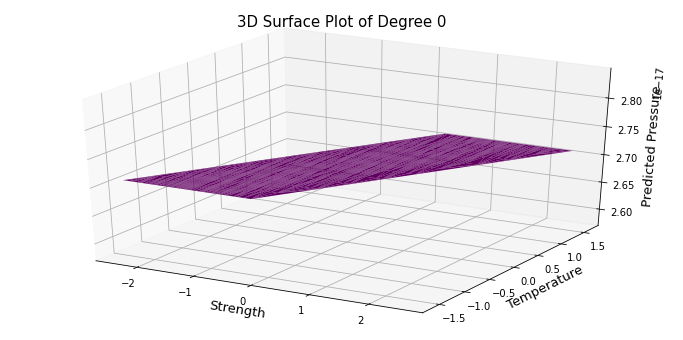

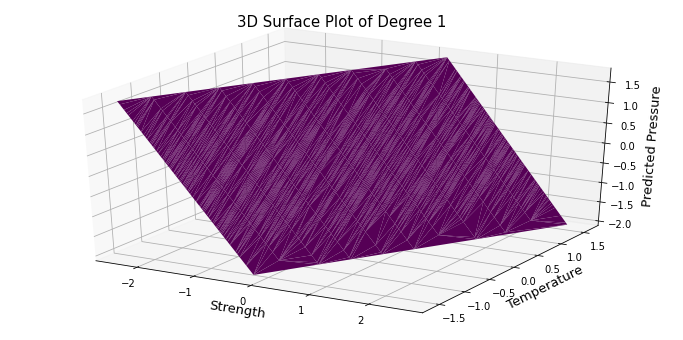

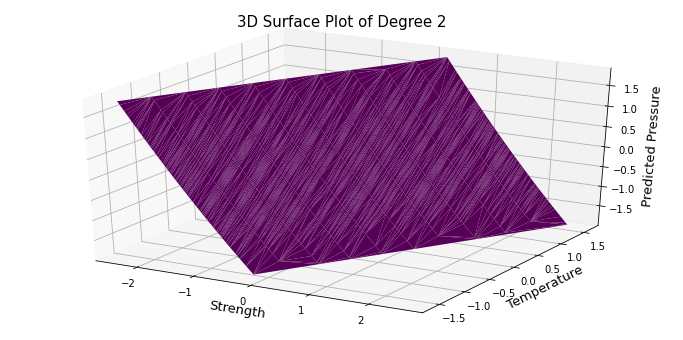

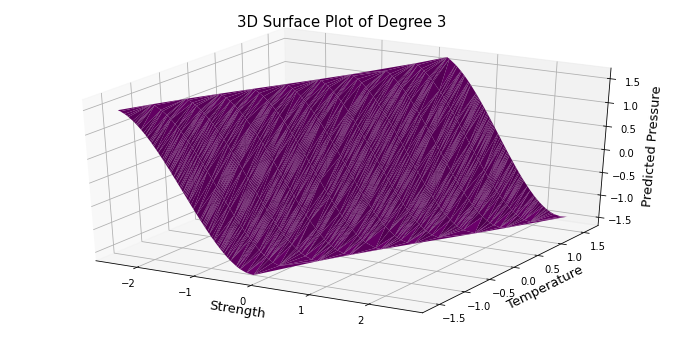

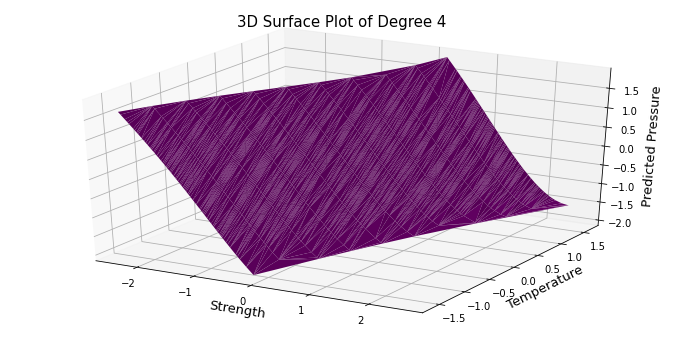

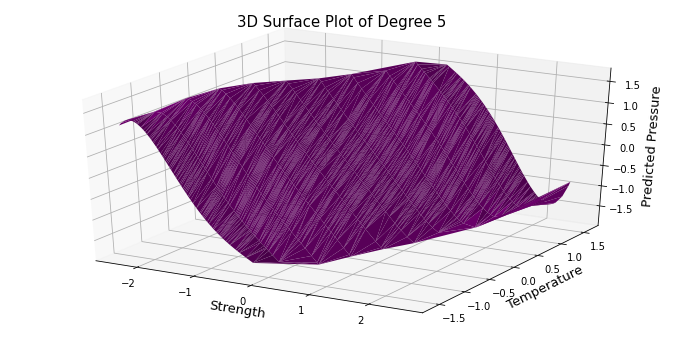

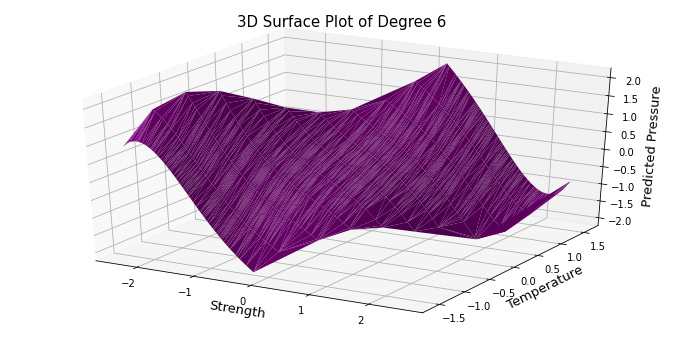

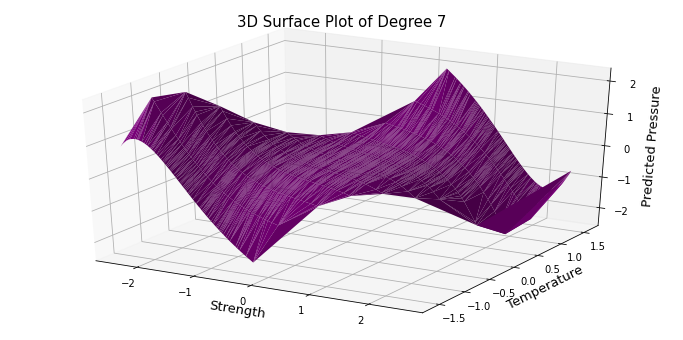

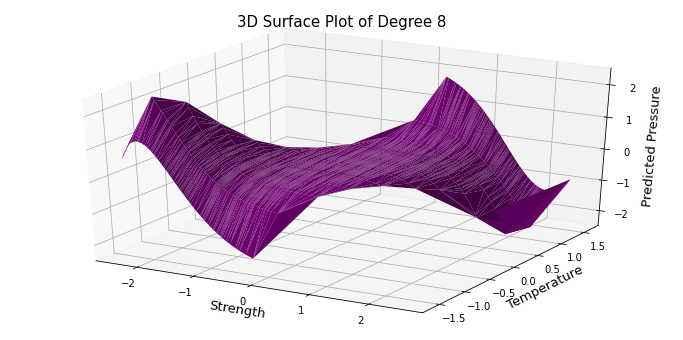

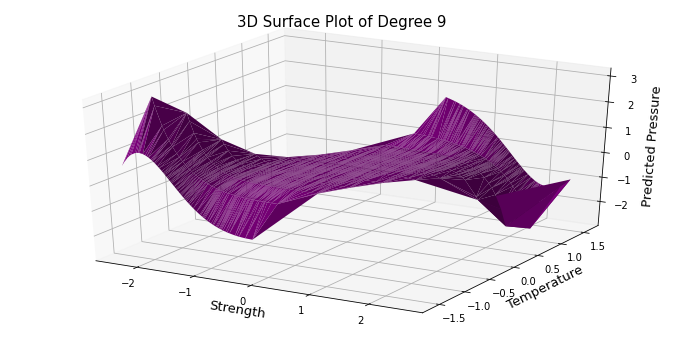

In [ ]:
E_train=[0]*10
final_W=[]
E_test=[0]*10

iterations=8000
graph_GD=np.zeros((10,(int)(iterations/50)))
eta=[0.5,0.5,0.01,0.04,0.01,0.0035,0.0008,0.00015,0.00003,0.000004]
for i in range(10):
    e=eta[i]
    n=(int)((i+1)*(i+2)/2)
    W=np.random.randn(n,1)*0.01
    X=df_train.iloc[:,:n].to_numpy()
    error,W_optimized,graph_GD=GD(X,W,e,Y=y_actual_train,iterations=iterations,deg=i,graph=graph_GD)
    final_W.append(W_optimized)
    Er_train=np.dot(df_train.iloc[:,:n],W_optimized).T-y_actual_train
    E_train[i]=(np.mean(np.multiply(Er_train,Er_train)))
    Er_test=np.dot(df_test.iloc[:,:n],W_optimized).T-y_actual_test
    E_test[i]=(np.mean(np.multiply(Er_test,Er_test)))
    Y_pred=np.dot(X,W_optimized)
    y=[]
    for j in Y_pred:
      for r in j:
        y.append(r)
    stro=".png"
    t="3D Surface Plot of Degree "+str(i)
    fig=plt.figure(figsize=(12,6))
    ax1=fig.gca(projection="3d")
    ax1.set_title(t,fontsize=15)
    ax1.set_xlabel('Strength',fontsize=13)
    ax1.set_ylabel('Temperature',fontsize=13)
    ax1.set_zlabel('Predicted Pressure',fontsize=13)
    ax1.plot_trisurf(x1,x2,y,color='purple')
    fig.savefig(str(i)+stro)
    plt.show





# New Section

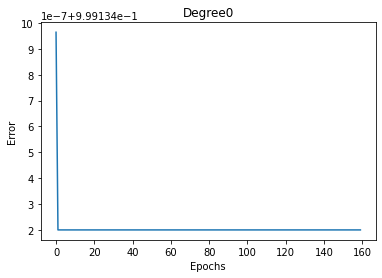

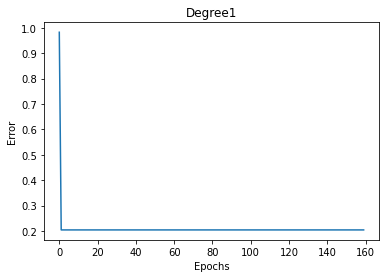

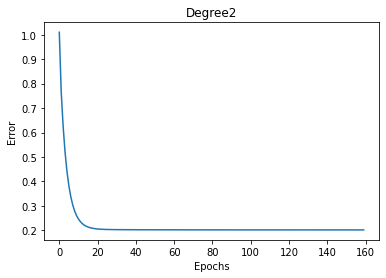

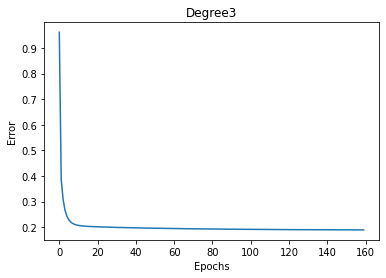

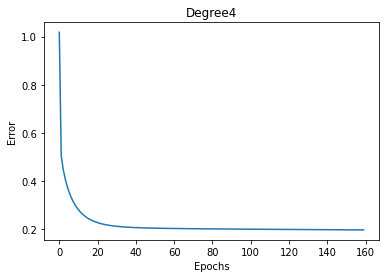

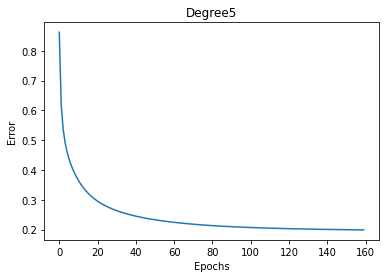

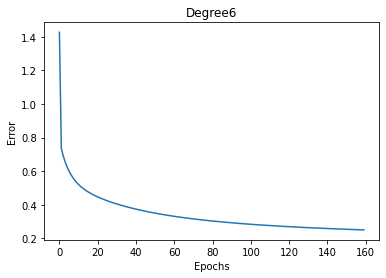

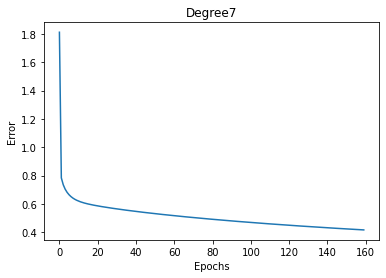

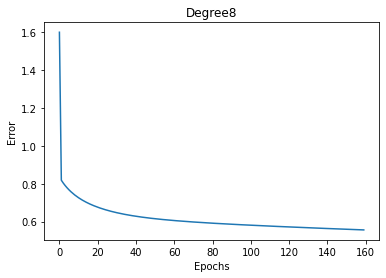

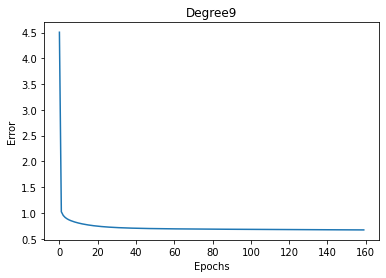

In [ ]:
a=np.arange(0,(int)(iterations/50))
for i in range(10):
    plt.plot(a,graph_GD[i,:])
    tit='Degree'+str(i)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(tit)
    plt.show()

In [ ]:
print(E_train)
print(E_test)

[0.999134199134196, 0.20433883927412205, 0.2019078176951913, 0.1890664902834132, 0.19694983359195414, 0.19856320391661667, 0.2500168531395718, 0.4157535111300417, 0.5560071226393348, 0.6698184945517838]
[1.133168468055312, 0.21590782197672465, 0.2150403785787567, 0.19879527471663658, 0.20920285932421195, 0.21483972288828457, 0.28611904262770255, 0.48196772831928353, 0.6326668773729522, 0.7499813813843297]


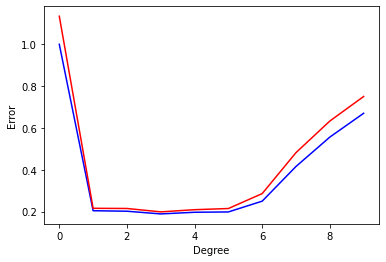

In [ ]:
a=[0,1,2,3,4,5,6,7,8,9]
plt.plot(a,E_train,'b')
plt.plot(a,E_test,'r')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()

In [ ]:
np.printoptions(threshold=np.inf)
np.printoptions(threshold=np.inf) 
k=0;
for i in graph_GD:
  print("start of degree:")
  k=k+1;
  print(k)
  for j in i:
    print(j)

start of degree:
1
0.9991349643141744
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134199134196
0.999134

In [ ]:
def SGD(X,W,eta,Y,iterations,deg,min,W_opt):
    training_error = np.zeros((iterations,1))
    count=0
    k=0
    W_opt=W
    for i in range(iterations):
      for index in range(X.shape[0]):
        ind_X=X[index,:]
        ind_Y=Y[index]
        E=np.dot(ind_X,W).T-ind_Y
        training_error[i]=np.multiply(E,E)
        for j in range(W.shape[0]):
            W[j]=W[j]-eta*np.multiply(E,X[index,j])
        if count%50==0:
          if k<graph.shape[1]:
            graph[deg][k]=training_error[i]
            k+=1
        count+=1
        Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
        Overall_train=(np.mean(np.multiply(Er_train,Er_train)))
        if Overall_train<min:
          min=Overall_train
          W_opt=W    
       
    return training_error,W_opt

0
[[0.07202049]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
1
[[ 0.00345616]
 [-1.76515301]
 [ 1.46660253]]
[[ 1.          0.92264888  1.27439395]
 [ 1.          1.12837464  1.59025769]
 [ 1.          1.21066495  1.59025769]
 ...
 [ 1.          0.08603077 -0.62078847]
 [ 1.          0.09974582  0.95853022]
 [ 1.          0.14089098 -0.93665221]]
2
[[-0.14300974]
 [-1.76419194]
 [ 1.40601866]
 [ 0.15971357]
 [-0.23604836]
 [ 0.15944122]]
[[ 1.          0.92264888  1.27439395  0.85128095  1.17581815  1.62407995]
 [ 1.          1.12837464  1.59025769  1.27322933  1.79440645  2.52891952]
 [ 1.          1.21066495  1.59025769  1.46570961  1.92526924  2.52891952]
 ...
 [ 1.          0.08603077 -0.62078847  0.00740129 -0.05340691  0.38537833]
 [ 1.          0.09974582  0.95853022  0.00994923  0.09560939  0.91878017]
 [ 1.          0.14089098 -0.93665221  0.01985027 -0.13196584  0.87731736]]
3
[[-0.01346997]
 [-1.90355979]
 [ 1.64234724]
 [ 0.11675744]
 [-0.13430752]
 [ 0.09812801]
 [ 0.3843565

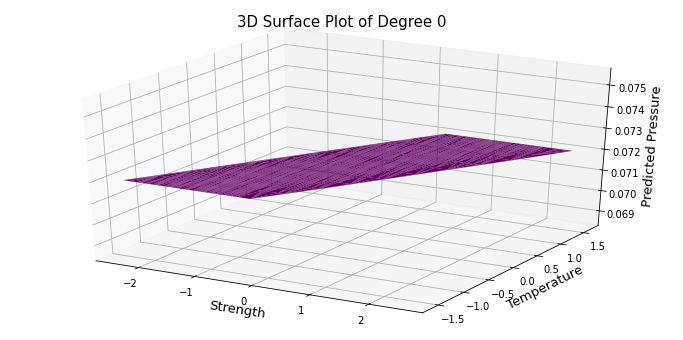

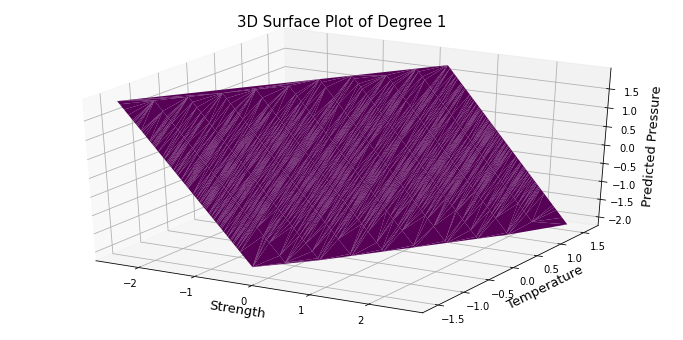

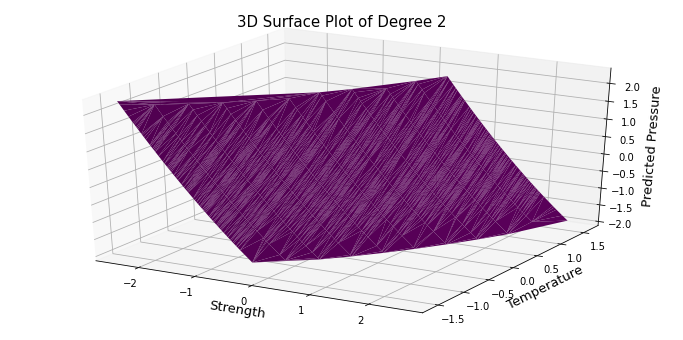

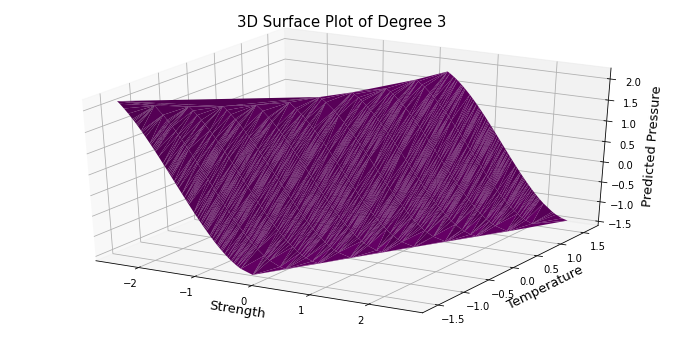

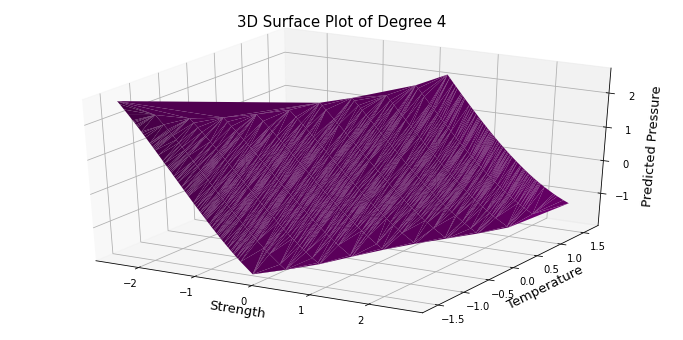

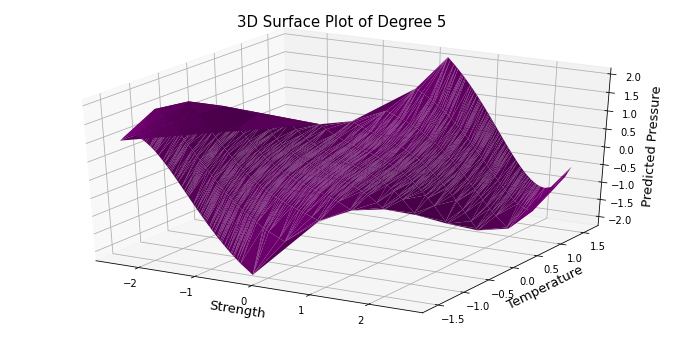

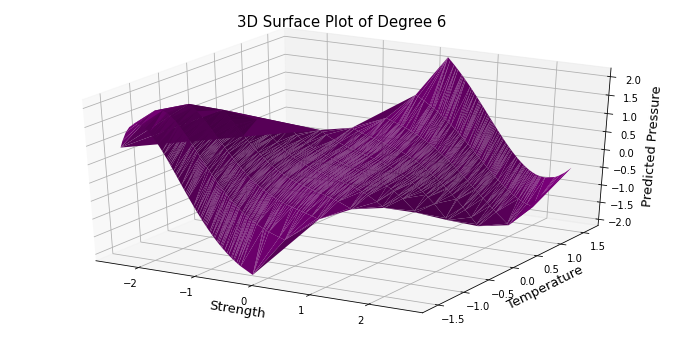

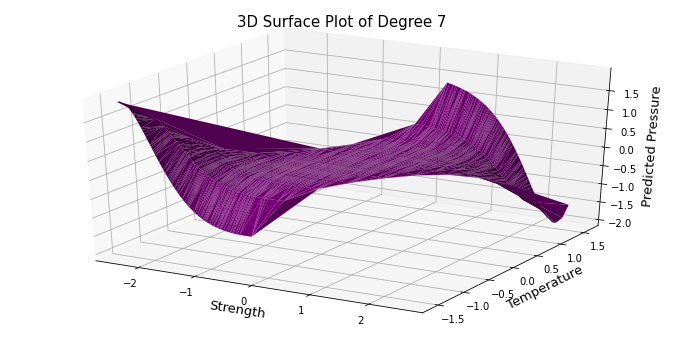

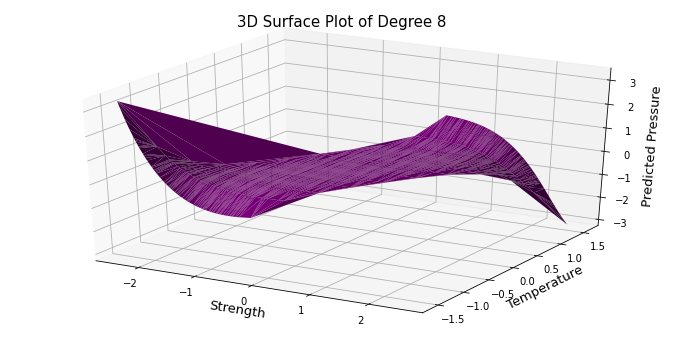

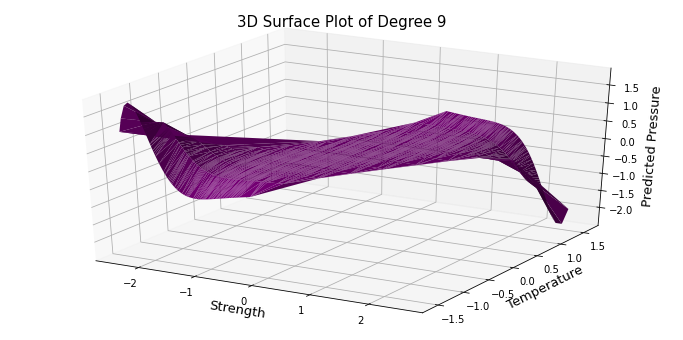

In [ ]:
E_train=[0]*10
final_W=[]
E_test=[0]*10
X_dummy=df_train.iloc[:,:1].to_numpy()
iterations=50
graph=np.zeros((10,(int)((X_dummy.shape[0]*iterations)/50)))


eta=[0.1,0.1,0.05,0.009,0.002,0.00009,0.00007,0.000001,0.0000005,0.00000005]
for i in range(10):
    print(i)
    min=3
    e=eta[i]
    n=(int)((i+1)*(i+2)/2)
    W=np.random.randn(n,1)*0.01
    W_opt=np.zeros((n,1))
    X=df_train.iloc[:,:n].to_numpy()
    error,W_optimized=SGD(X,W,e,Y=y_actual_train,iterations=iterations,deg=i,W_opt=W_opt,min=min)
    print(W_optimized)
    print(X)
    E_train[i]=error.min()
    final_W.append(W_optimized)
    Er_train=np.dot(df_train.iloc[:,:n],W_optimized).T-y_actual_train
    E_train[i]=(np.mean(np.multiply(Er_train,Er_train)))
    Er_test=np.dot(df_test.iloc[:,:n],W_optimized).T-y_actual_test
    E_test[i]=(np.mean(np.multiply(Er_test,Er_test)))
    Y_pred=np.dot(X,W_optimized)
    y=[]
    for j in Y_pred:
      for r in j:
        y.append(r)
    stro="SGD.png"
    t="3D Surface Plot of Degree "+str(i)
    fig=plt.figure(figsize=(12,6))
    ax1=fig.gca(projection="3d")
    ax1.set_title(t,fontsize=15)
    ax1.set_xlabel('Strength',fontsize=13)
    ax1.set_ylabel('Temperature',fontsize=13)
    ax1.set_zlabel('Predicted Pressure',fontsize=13)
    ax1.plot_trisurf(x1,x2,y,color='purple')
    fig.savefig(str(i)+stro)
    plt.show

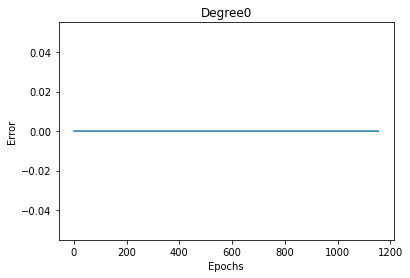

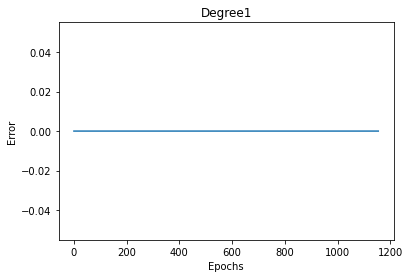

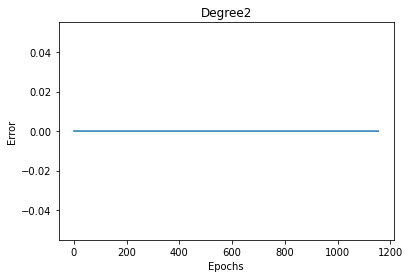

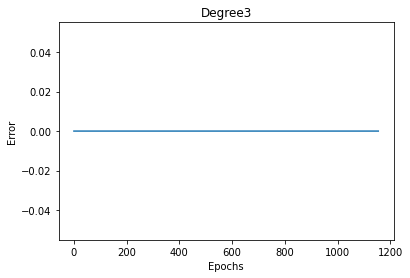

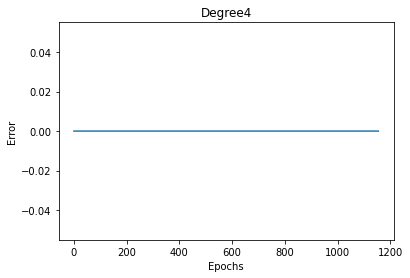

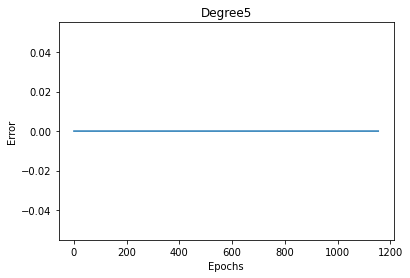

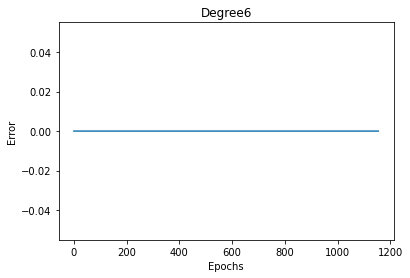

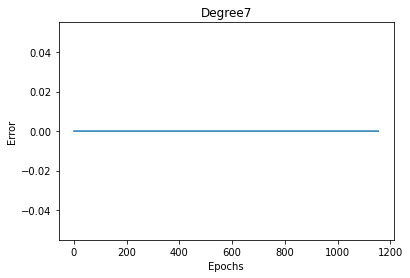

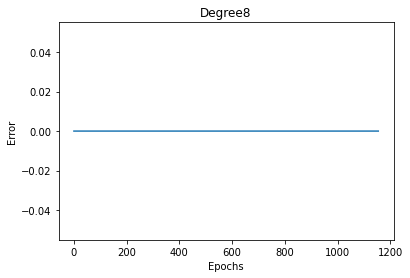

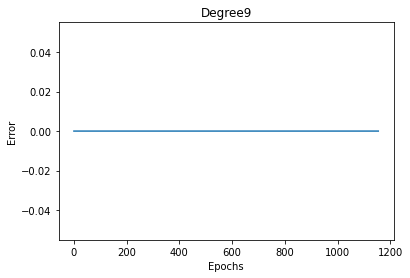

In [ ]:
a=np.arange(0,(int)((X_dummy.shape[0]*iterations)/50))
for i in range(10):
    plt.plot(a,graph[i,:])
    tit='Degree'+str(i)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    
    plt.title(tit)
    plt.show()

In [ ]:
print(E_train)
print(E_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


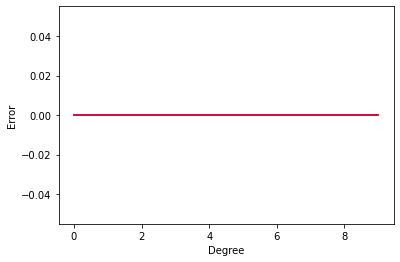

In [ ]:
a=[0,1,2,3,4,5,6,7,8,9]
plt.plot(a,E_train,'b')
plt.plot(a,E_test,'r')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()

In [ ]:
def GD_RL(X,W,eta,Y,iterations,deg,s,lam):
    training_error = np.zeros((iterations,1))
    k=0
    if s=="Ridge":
        for i in range(iterations):
            np.reshape(Y,(1155,1))
            E=np.dot(X,W).T-Y
            training_error[i]=((np.sum(np.multiply(E,E))) + (lam/2)*np.sum(np.multiply(W,W)))/len(X)
            for j in range(W.shape[0]):
                W[j]=W[j]-eta*(2*np.sum(np.multiply(E,X[:,j]))+lam*W[j])/len(X)
           
        return training_error,W
    else:
        for i in range(iterations):
            np.reshape(Y,(1155,1))
            E=np.dot(X,W).T-Y
            training_error[i]=((np.sum(np.multiply(E,E))) + (lam/2)*(np.sum(np.abs(W))))/len(X)
            for j in range(W.shape[0]):
                W[j]=W[j]-eta*(2*np.sum(np.multiply(E,X[:,j]))+lam*np.sign(W[j]))/len(X)
           
        return training_error,W


In [ ]:
lambdaa=[]
E_train_list=[]
E_test_list=[]
for i in range(5):
  lambdaa.append(0.000005+i*0.000001)
for i in lambdaa:
  k=9
  eta=0.000005
  iterations=50000
  n=(int)((k+1)*(k+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  Y=y_actual_train
  error,W=GD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="Ridge",lambdaa=i)
  Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
  E_train=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W).T-y_actual_test
  E_test=(np.mean(np.multiply(Er_test,Er_test)))
  E_train_list.append(E_train)
  E_test_list.append(E_test)
  


  




TypeError: ignored

In [ ]:
E_train_n=np.array(E_train_list)
E_train_n



array([0.54667481, 0.53559253, 0.54591454, 0.55271467, 0.5489326 ])

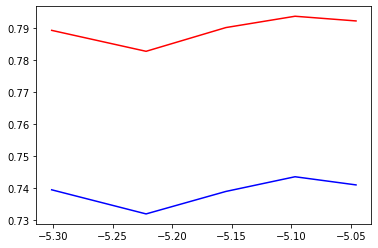

In [ ]:
BGD_R_R=pd.DataFrame()
lam_n=np.array(lambdaa)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
BGD_R_R=pd.concat([BGD_R_R,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
BGD_R_R=pd.concat([BGD_R_R,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
BGD_R_R=pd.concat([BGD_R_R,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=lambdaa
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.show()

In [ ]:
BGD_R_R

0         1         2
0  0.000005  0.739375  0.789162
1  0.000006  0.731842  0.782620
2  0.000007  0.738860  0.790031
3  0.000008  0.743448  0.793568
4  0.000009  0.740900  0.792100

In [ ]:
lambdaa=[]
E_train_list=[]
E_test_list=[]
for i in range(5):
  lambdaa.append(0.0000001+i*0.0000003)
for i in lambdaa:
  k=9
  
  eta=0.000005
  iterations=50000
  n=(int)((k+1)*(k+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  Y=y_actual_train
  error,W=GD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="lasso",lambdaa=i)
  Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
  E_train=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W).T-y_actual_test
  E_test=(np.mean(np.multiply(Er_test,Er_test)))
  E_train_list.append(E_train)
  E_test_list.append(E_test)

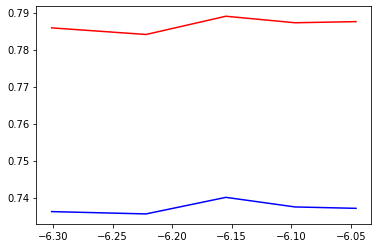

In [ ]:
BGD_R_L=pd.DataFrame()
lam_n=np.array(lambdaa)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=[0.0000005,0.0000006,0.0000007,0.0000008,0.0000009]
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.show()

In [ ]:
BGD_R_L

0         1         2
0  1.000000e-07  0.736195  0.785856
1  4.000000e-07  0.735569  0.784068
2  7.000000e-07  0.740047  0.789000
3  1.000000e-06  0.737455  0.787241
4  1.300000e-06  0.737077  0.787546

In [ ]:
def SGD_RL(X,W,eta,Y,iterations,deg,s,lam,min,W_opt):
    training_error = np.zeros((iterations,1))
    
    k=0
    if s=='Ridge':
      print("Ridge")
      for i in range(iterations):
        for index in range(X.shape[0]):
            ind_X=X[index,:]
            ind_Y=Y[index]
            E=np.dot(ind_X,W).T-ind_Y
            training_error[i]=np.multiply(E,E)+(lambdaa/2)*(np.sum(np.multiply(W,W)))
            for j in range(W.shape[0]):
                W[j]=W[j]-eta*(np.multiply(E,X[index,j])+lambdaa*W[j])
            Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
            Overall_train=(np.mean(np.multiply(Er_train,Er_train)))
            if Overall_train<min:
              min=Overall_train
              W_opt=W
       
      return training_error,W,min,W_opt
    else:
      for i in range(iterations):
        for index in range(X.shape[0]):
            ind_X=X[index,:]
            ind_Y=Y[index]
            E=np.dot(ind_X,W).T-ind_Y
            training_error[i]=np.multiply(E,E)+(lambdaa)*(np.sum(np.abs(W)))
            for j in range(W.shape[0]):
                W[j]=W[j]-eta*(np.multiply(E,X[index,j])+lambdaa*np.sign(W[j]))
            Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
            Overall_train=(np.mean(np.multiply(Er_train,Er_train)))
            if Overall_train<min:
              min=Overall_train
              W_opt=W
            
       
      return training_error,W,min,W_opt  

    

In [ ]:
lambdaa=[]
E_train_list=[]
E_test_list=[]

for i in range(5):
  lambdaa.append(0.00000002+i*0.00000001)
for i in lambdaa:
  k=9
  min=3
  eta=0.0000001
  iterations=50
  n=(int)((k+1)*(k+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  Y=y_actual_train
  error,W,min,W_opt=SGD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="Lasso",lambdaa=i,min=min,W_opt=W_opt)
  Er_train=np.dot(df_train.iloc[:,:n],W_opt).T-y_actual_train
  E_train=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W_opt).T-y_actual_test
  E_test=(np.mean(np.multiply(Er_test,Er_test)))
  E_train_list.append(E_train)
  E_test_list.append(E_test)


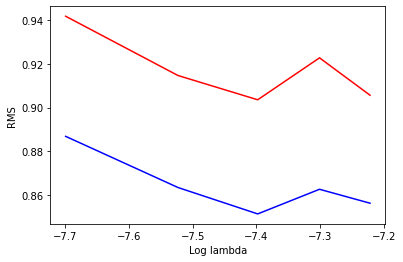

In [ ]:
SGD_R_R=pd.DataFrame()
lam_n=np.array(lambdaa)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=lambdaa
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.xlabel('Log lambda')
plt.ylabel('RMS')
plt.show()

In [ ]:
SGD_R_R

0         1         2
0  2.000000e-08  0.886898  0.941726
1  3.000000e-08  0.863544  0.914671
2  4.000000e-08  0.851491  0.903594
3  5.000000e-08  0.862740  0.922739
4  6.000000e-08  0.856379  0.905674

In [ ]:
lambdaa=[]
E_train_list=[]
E_test_list=[]

for i in range(5):
  lambdaa.append(0.00000003+i*0.00000001)
for i in lambdaa:
  k=9
  min=3
  eta=0.0000001
  iterations=50
  n=(int)((k+1)*(k+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  Y=y_actual_train
  error,W,min,W_opt=SGD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="Ridge",lambdaa=i,min=min,W_opt=W_opt)
  Er_train=np.dot(df_train.iloc[:,:n],W_opt).T-y_actual_train
  E_train=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W_opt).T-y_actual_test
  E_test=(np.mean(np.multiply(Er_test,Er_test)))
  E_train_list.append(E_train)
  E_test_list.append(E_test)

Ridge
Ridge
Ridge
Ridge
Ridge


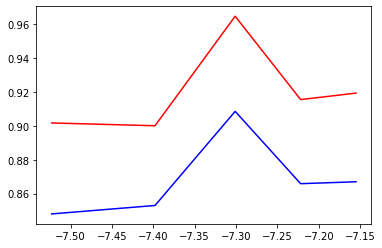

In [ ]:
SGD_R_R=pd.DataFrame()
lam_n=np.array(lambdaa)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=lambdaa
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.show()

In [ ]:
SGD_R_R

0         1         2
0  3.000000e-08  0.847998  0.901738
1  4.000000e-08  0.852980  0.900087
2  5.000000e-08  0.908585  0.964786
3  6.000000e-08  0.865864  0.915546
4  7.000000e-08  0.866986  0.919377